# Week-4: Part-2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set size of figure
plt.rcParams['figure.figsize'] = [8, 8]
# Set size of font
plt.rcParams['font.size'] = 10

## GMM


- Pick a mixture $k$ from $K$ mixtures based on the categorical distribution governing it
- Sample a point from the $k^{th}$ Gaussian

GMM is just many different mixtures spread around.

## Problem-1

Consider a GMM with $K = 3$. The mixture probabilities are given below. It is easier to work with zero-indexing, hence we will index our mixtures starting from $0$:

$$
\pi_0 = 0.3\\
\pi_1 = 0.5\\
\pi_2 = 0.2
$$

Perform step-1 of the sampling process by choosing one of the three mixtures based on the above distribution.

pi_i is the probablity of choosing the ith mixture.


In [3]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
k = rng.choice([0, 1, 2], size = 1, p = [0.3, 0.5, 0.2])[0]
k

1

## Problem-2

Now we move to step-2 of the sampling process. Sample a point from mixture $k$ (obtained from the previous question). The means and variances of the mixtures are as follows:

$$
\mu_1 = -4, \sigma_1^2 = 2\\
\mu_2 = 0, \sigma_2^2 = 1\\
\mu_3 = 5, \sigma_3^2 = 3
$$

rng.normal generates a random number from the given distribution if the size was explicitly specified, we would get that many data points as the output, the inputs are the mean and standard deviation.


In [6]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
mu = np.array([-4, 0, 5])
sigma = np.sqrt(np.array([2, 1, 3]))
rng.normal(mu[k], sigma[k])

0.9323224351204542

## Problem-3

Now that we have sampled one point, we are ready to do more. Sample $100,000$ points from the GMM. Store the samples in a NumPy array `X` of shape $(100,000, )$. `X[i]` should hold the value of the $i^{th}$ point generated from the GMM. Find the mean of the data points generated.

In [ ]:
### RNG ###
rng = np.random.default_rng(seed=1001) # if seed is defined, after this whenever rng is used ,the output will always be the same.
### Solution ###
mu = np.array([-4, 0, 5])
sigma = np.sqrt(np.array([2, 1, 3]))
n = 100000
X = []
for i in range(n):
    k = rng.choice([0, 1, 2],p=[0.3,0.5,0.2])  #decides which mixture we should take from 

    x = rng.normal(mu[k], sigma[k]) #decides what should the test data point be, this is also randomly selected

    X.append(x)
X = np.array(X)
X.mean()

-0.1930762698848285

## Problem-4

Plot a histogram of the dataset. Play around with the `bins` parameter of the `plt.hist` method.

(array([2.000e+00, 1.000e+00, 1.300e+01, 3.000e+00, 1.800e+01, 1.800e+01,
        3.300e+01, 6.800e+01, 8.300e+01, 1.170e+02, 1.640e+02, 2.360e+02,
        3.160e+02, 4.140e+02, 5.230e+02, 6.050e+02, 8.190e+02, 9.110e+02,
        1.163e+03, 1.308e+03, 1.438e+03, 1.549e+03, 1.674e+03, 1.715e+03,
        1.817e+03, 1.822e+03, 1.811e+03, 1.713e+03, 1.641e+03, 1.424e+03,
        1.340e+03, 1.275e+03, 1.156e+03, 1.236e+03, 1.276e+03, 1.437e+03,
        1.691e+03, 2.091e+03, 2.498e+03, 3.050e+03, 3.436e+03, 3.891e+03,
        4.126e+03, 4.400e+03, 4.287e+03, 3.969e+03, 3.650e+03, 3.178e+03,
        2.547e+03, 2.006e+03, 1.606e+03, 1.236e+03, 9.460e+02, 7.000e+02,
        5.750e+02, 5.140e+02, 5.130e+02, 5.100e+02, 6.220e+02, 6.200e+02,
        7.100e+02, 7.900e+02, 8.300e+02, 8.780e+02, 8.960e+02, 9.530e+02,
        9.880e+02, 9.520e+02, 9.570e+02, 1.026e+03, 9.220e+02, 8.280e+02,
        7.730e+02, 7.190e+02, 6.360e+02, 6.040e+02, 5.200e+02, 4.210e+02,
        3.600e+02, 2.990e+02, 2.480e+0

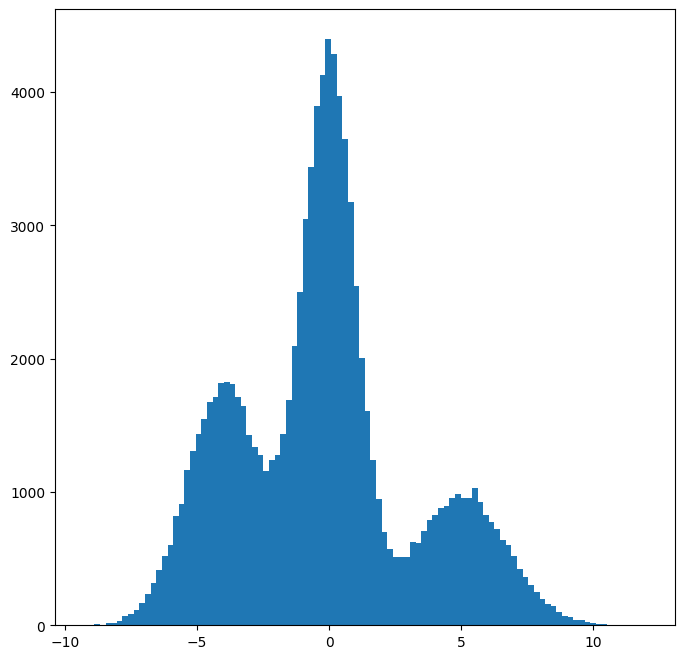

In [ ]:
plt.hist(X, bins = 100)
#bins means how many x-axis intervals it should be divided into.

## EM algorithm

EM ALgorithm consists of 5-stages: 

- Initialization
- E-step
- M-step
- Stopping criterion
- Algorithm


## Problem-5

Write a function `init` that initializes the parameters of the GMM and returns `theta_0`, a NumPy array of shape $(3K, )$. The first $K$ elements of `theta_0` ($\boldsymbol{\theta}^{(0)}$) represents the means of the three mixtures, the next $K$ represent the variances and the last $K$ represent the mixture probabilities.

The exact values to be used are as follows:

- $\mu_0 = 1, \mu_1 = 2, \mu_2 = 3$
- $\sigma_0^2 = \sigma_1^2 = \sigma_2^2 = 1$
- $\pi_0 = \pi_1 = \pi_2 = 1/3$ 

In [ ]:
def init():
    return np.array([1, 2, 3, 1, 1, 1, 1 / 3, 1 / 3, 1 / 3])

theta_0 = init()

4.163331998932265

## Problem-6

Write a function `estep` that accepts `theta` and `X` as arguments. It should perform the E-step and return an array `lamb` of shape `(n, K)`. The element `lamb[i][k]` is equal to $\lambda_k^{i}$.

In [22]:
def gaussian(x, mu, sigma):
    den = np.sqrt(2 * np.pi) * sigma
    num = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return num / den

In [23]:
def estep(theta, X):
    n = X.shape[0]
    K = theta.shape[0] // 3
    mu, sigma, pi = theta[: K],np.sqrt(theta[K: 2 * K]),theta[2 * K: ]
    lamb = np.zeros((n, K))

    for i in range(n):
        x = X[i]
        evidence = sum([pi[k] * gaussian(x, mu[k], sigma[k]) for k in range(K)])
    
        for k in range(K):
            prior = pi[k]
            likelihood = gaussian(x, mu[k], sigma[k])
            lamb[i][k] = prior * likelihood / evidence
    return lamb

lamb_1 = estep(theta_0, X)

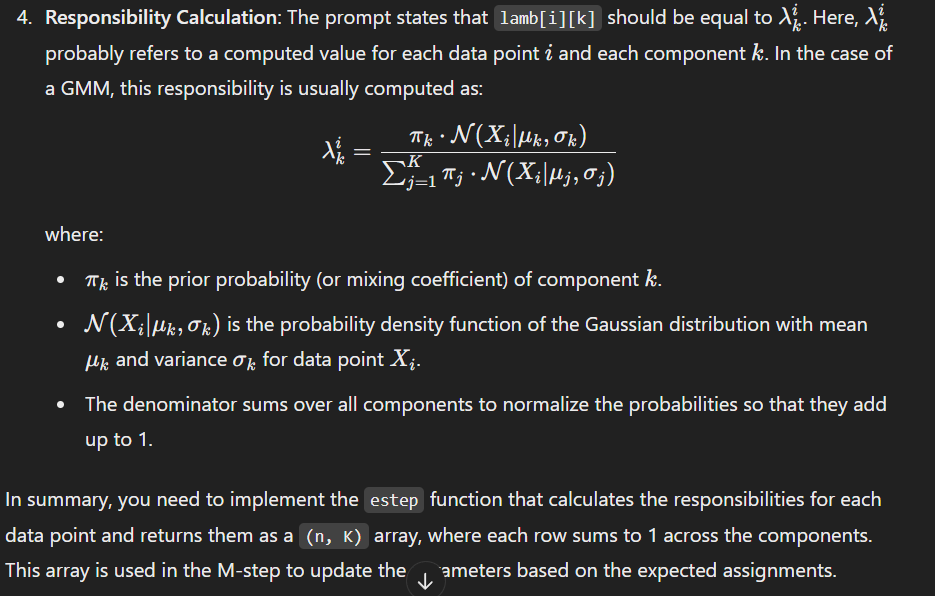

## Problem-7

Write a function `mstep` that accepts `lamb` and `X` as arguments. It should perform the M-step and return a NumPy array `theta`, the updated parameters, namely. We follow the same convention for storing the parameters as was done during the init step.

In the m-step , we figure out the three parameters simultaneously

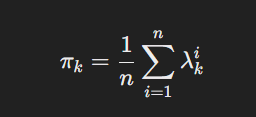

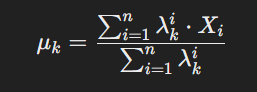

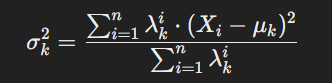

In [ ]:
def mstep(lamb, X):
    n, K = lamb.shape
    mu = np.zeros(K)
    var = np.zeros(K)
    pi = np.zeros(K)
    for k in range(K):
        mu[k] = (X * lamb[:, k]).sum() / lamb[:, k].sum()
        var[k] = (((X - mu[k]) ** 2) * lamb[:, k]).sum() / lamb[:, k].sum()
        pi[k] = lamb[:, k].sum() / n
    return np.concatenate([mu, var, pi])

theta_1 = mstep(lamb_1, X) #lamb1 is what we got from the estep.
#X was the data we created.
print(theta_1,theta_0)
#in this case , the error is a lot , so we do this process repeatedly.

[-1.84401327  1.0795422   4.93145319  4.99571036  2.50234357  3.8634084
  0.68226196  0.13029543  0.1874426 ] [1.         2.         3.         1.         1.         1.
 0.33333333 0.33333333 0.33333333]


## Problem-8

Given two vectors $\boldsymbol{\theta}^{(t)}$ and $\boldsymbol{\theta}^{(t + 1)}$, write a function `distance` that accepts these two vectors as arguments and returns the distance between them, this is like the error between them, we have to minimize:

$$
||\boldsymbol{\theta}^{(t + 1)} - \boldsymbol{\theta}^{(t)}||
$$


In [26]:
def distance(theta_old, theta_new):
    return np.linalg.norm(theta_old - theta_new)

distance(theta_0, theta_1)

6.266759156221227

## Problem-9

Perform the EM algorithm until convergence. The stopping-criterion is that the distance between the two parameter-vectors should be less than $0.01$.

$$
||\boldsymbol{\theta}^{(t + 1)} - \boldsymbol{\theta}^{(t)}|| < 0.01
$$

This step is quite time taking. Took 4 minutes and 72 iterations ;-;.

In [27]:
epsilon, iter = 0.01, 1
theta, theta_prev = theta_1, theta_0
while distance(theta, theta_prev) >= epsilon:
    lamb = estep(theta, X)
    theta_prev, theta = theta, mstep(lamb, X)
    iter += 1
iter

72

## Problem-10

Let us now verify the correctness of our algorithm. We know the true parameters here:

$$
\boldsymbol{\theta} = \begin{bmatrix}
-4\\
0\\
5\\
2\\
1\\
3\\
0.3\\
0.5\\
0.2
\end{bmatrix}
$$

Let $\boldsymbol{\theta}^{*}$ be the parameter at convergence. Compute the distance between this vector and the true parameter vector.

In [28]:
theta_orig = np.array([-4, 0, 5, 2, 1, 3, 0.3, 0.5, 0.2])
distance(theta, theta_orig)

0.10196573248897495

## Problem-11

We shall do a hard clustering of the data-points. Use the final `lamb` value obtained and cluster the points using:

$$
z_i = \operatorname*{argmax} \limits_{k} \lambda_k^{i}
$$


The lamb array is the responsiblity matrix of shape n x K , where n is the number of data points and k is the number of clusters.

lamb[i][k] is the probablity of cluster k for datapoint i, so we just need to find the which index has the highest probablity and assign it to that cluster.

[1 0 0 ... 2 1 1]


(array([268., 234., 226., 254., 230., 224., 223., 248., 272., 301., 279.,
        270., 332., 344., 329., 360., 339., 397., 380., 408., 389., 402.,
        414., 449., 410., 467., 426., 462., 444., 419., 457., 411., 486.,
        446., 466., 409., 358., 406., 354., 356., 339., 353., 310., 306.,
        288., 261., 279., 249., 241., 207., 200., 188., 182., 143., 137.,
        137., 115., 112., 105.,  95.,  82.,  71.,  67.,  67.,  63.,  44.,
         44.,  39.,  29.,  37.,  25.,  26.,  19.,  15.,  12.,  18.,  11.,
         12.,   8.,   7.,   4.,   4.,   4.,   2.,   4.,   2.,   2.,   1.,
          2.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          2.]),
 array([ 2.29376182,  2.39110094,  2.48844006,  2.58577918,  2.6831183 ,
         2.78045742,  2.87779654,  2.97513566,  3.07247478,  3.1698139 ,
         3.26715302,  3.36449214,  3.46183126,  3.55917038,  3.6565095 ,
         3.75384862,  3.85118774,  3.94852686,  4.04586598,  4.1432051 ,
         4.24054422,  4.33

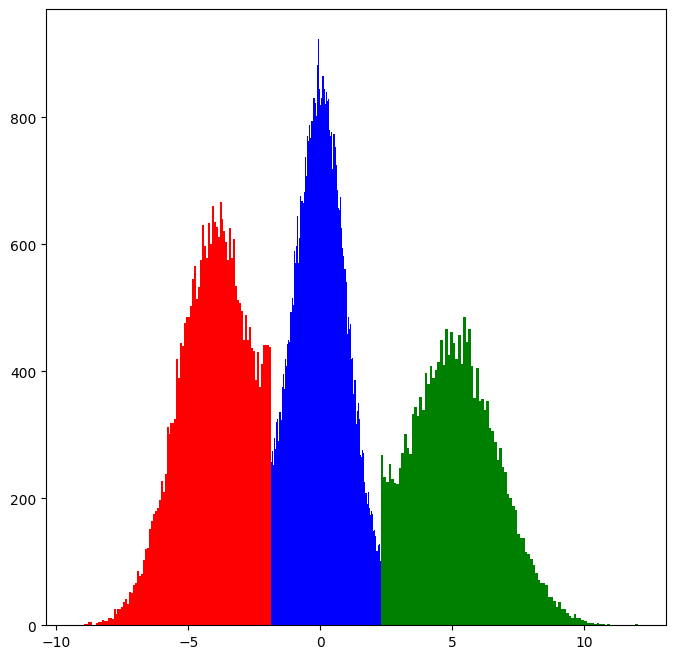

In [ ]:
ind = lamb.argmax(axis = 1) # this creates ind as an array/list having arr[i] = index of max probablity from the k clusters.

print(ind)
assert(len(X)==len(ind))

plt.hist(X[ind == 0], bins = 100, color = 'red')  # this checks each element in X, if ind[i]==0 , it adds X[i] to the graph with the color red.
#same goes for blue and green, this way the hard clustering is done, we choose which cluster it has the highest probablity of being in and assign 
#that cluster to it.
plt.hist(X[ind == 1], bins = 100, color = 'blue')
plt.hist(X[ind == 2], bins = 100, color = 'green')